In [13]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [14]:
import folium
from folium import Popup

In [15]:
sewage = pd.read_csv('SewageLeaksRefined.csv')
colours = ['gray','blue', 'green', 'orange', 'red', 'darkred']
def assign_colour(days):
    if days >= 200:
        return colours[5]
    elif days >= 100:
        return colours[4]
    elif days >= 75:
        return colours[3]
    elif days >= 50:
        return colours[2]
    elif days >= 25:
        return colours[1]
    else:
        return colours[0]

lobitos = folium.Map(location=[-4.457310481797269, -81.2811891931266], zoom_start=17)
# Add bubbles for each sewage pool
for _, row in sewage.iterrows():
    # Scale the radius based on duration (adjust multiplier as needed)
    radius = np.sqrt(row['Duration']) * 0.4

    tooltip_text = folium.Tooltip(f"""
    <b>{row['Name']}</b><br>
    Noted Date: {row['Noted']}<br>
    Resolved Date: {row['Resolved']}<br>
    Duration (Days): {row['Duration']}<br>
    Diameter: {row['Diameter']:,.2f}m<br>
    Severity Rating: {row['Severity']:,.1f}/5.0<br>
    Incident Type: {row['IssueType']}
    """, style='font-size: 20px;')

    # Add circle marker
    folium.CircleMarker(
        location=[row['Lat'], row['Lon']],
        radius=radius,
        color=assign_colour(row['Duration']),
        fill=True,
        fill_color=assign_colour(row['Duration']),
        fill_opacity=0.6,
        opacity=0.6,
        tooltip=tooltip_text
    ).add_to(lobitos)
lobitos

<module 'matplotlib.pyplot' from 'c:\\Users\\thoma\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

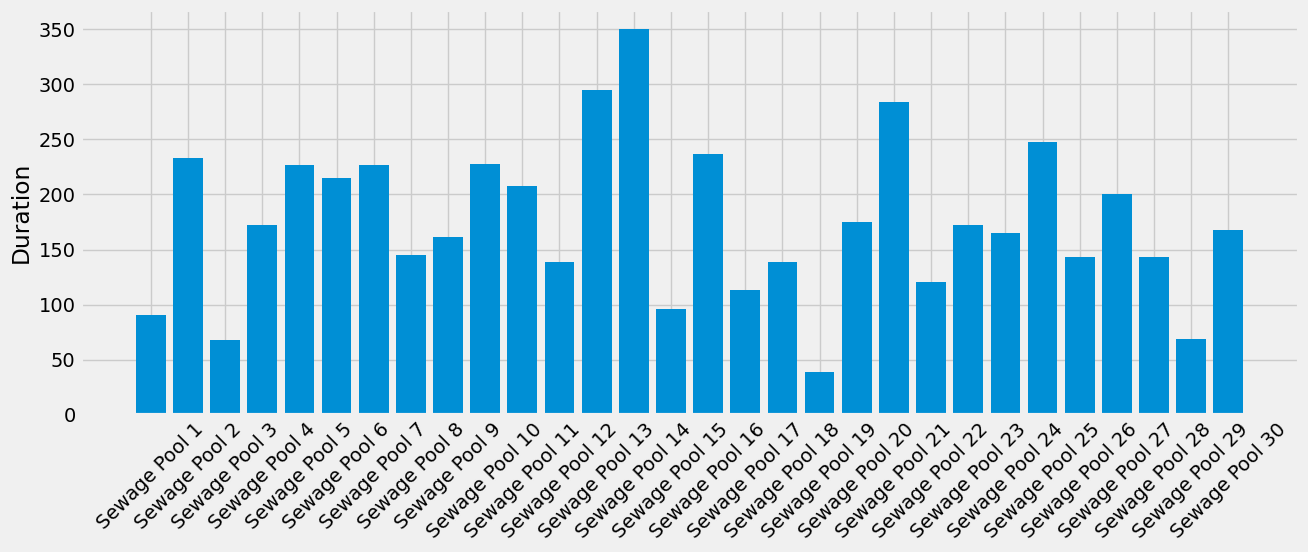

In [16]:
selected_yaxis = 'Duration'
limited = sewage.head(30)
fig = plt.figure(figsize=(14, 5))
plt.bar(limited['Name'], limited[selected_yaxis])
plt.ylabel(selected_yaxis)
plt.xticks(rotation=45)
plt